<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/Financial-Engineering/blob/master/Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Key Concepts

In [0]:
def generate_autocorrelated_data(theta, mu, sigma, N):
    X = np.zeros((N, 1))
    for t in range(1, N):
        X[t] = theta * X[t-1] + np.random.normal(mu, sigma)
    return X

def newey_west_SE(data):
    ind = range(0, len(data))
    ind = sm.add_constant(ind)
    model = regression.linear_model.OLS(data, ind).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    return model.bse[0]

def newey_west_matrix(data):
    ind = range(0, len(data))
    ind = sm.add_constant(ind)
    model = regression.linear_model.OLS(data, ind).fit()
    return sw.cov_hac(model)

In [0]:
# Useful Libraries
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera
import statsmodels.stats.sandwich_covariance as sw
from statsmodels import regression
import statsmodels.api as sm

##Data

In [0]:
np.random.seed(11)
POPULATION_MU = 105
POPULATION_SIGMA = 20
sample_size = 50

#Determining Confidence Intervals
##a. Mean

Determine the mean of the following artificial data in sample.

In [5]:
sample = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)

Mean = np.mean(sample)

print ("Mean:", Mean)

Mean: 103.22364700456181


##Standard Deviation

Determine standard deviation of the sample.

In [6]:
SD = np.std(sample)

print ("Standard Deviation:", SD)

Standard Deviation: 18.064573023858248


##Standard Error

Using the standard deviation and sample_size, determine the standard error for the sample.

In [7]:
SE = SD / np.sqrt(sample_size)

print ("Standard Error:", SE)

Standard Error: 2.5547164168819485


##Confidence Intervals

Using the standard error and mean, determine 95% (Z = 1.96), 90% (Z = 1.64), and 80% (Z = 1.28) confidence intervals for the sample.

In [8]:
print ("95% Confidence Interval:", (-1.96 * SE + Mean, 1.96 * SE + Mean))
print ("90% Confidence Interval:", (-1.64 * SE + Mean, 1.64 * SE + Mean))
print ("80% Confidence Interval:", (-1.28 * SE + Mean, 1.28 * SE + Mean))

95% Confidence Interval: (98.21640282747319, 108.23089118165043)
90% Confidence Interval: (99.03391208087541, 107.41338192824821)
80% Confidence Interval: (99.95360999095291, 106.49368401817071)


##Interpreting Confidence Intervals

Assuming our interval was correctly calculated and that the underlying data was independent, if we take many samples and make many 95% confidence intervals, the intervals will contain the true mean 95% of the time. Run 1000 samples and measure how many of their confidence intervals actually contain the true mean.

In [9]:
n = 1000
correct = 0
samples = [np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=sample_size) for i in range(n)]

for i in range(n):
    sample_mean = np.mean(samples[i])
    sample_SE = stats.sem(samples[i])
    if ((POPULATION_MU >= -1.96 * sample_SE + sample_mean) and (POPULATION_MU <= 1.96 * sample_SE + sample_mean)):
        correct += 1;

print ("Expected Result:", .95 * 1000)
print ("Actual Result", correct)

Expected Result: 950.0
Actual Result 932


#Central Limit Theorem
##a. Plotting Sample Means - Normal

Assuming our samples are independent, the distribution of the sample means should be normally distributed, regardless of the underlying distribution.

Draw 500 samples of size sample_size from the same normal distribution from question 1, plot the means of each of the samples, and check to see if the distribution of the sample means is normal using the jarque_bera function (see here more information on the Jarque-Bera test)

0.639560006166549
The distribution of sample means is likely normal.


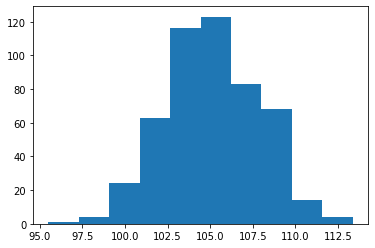

In [10]:
n = 500
normal_samples = [np.mean(np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=sample_size)) for i in range(n)]

#Your code goes here

plt.hist(normal_samples, 10)

_, pvalue, _, _ = jarque_bera(normal_samples)

print (pvalue)
if pvalue > 0.05:
    print ('The distribution of sample means is likely normal.')
else:
    print ('The distribution of sample means is likely not normal.')

##Plotting Sample Means - Exponential

Draw 500 samples of size sample_size from a new exponential distribution, plot the means of each of the samples, and check to see if the distribution of the sample means is normal.

0.3061297985512925
The distribution of sample means is likely normal, despite the underlying distribution being non-normal (exponential).


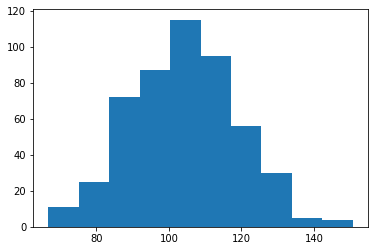

In [11]:
n = 500
expo_samples = [np.mean(np.random.exponential(POPULATION_MU, sample_size)) for i in range(n)]

plt.hist(expo_samples, 10)

_, pvalue, _, _ = jarque_bera(expo_samples)

print (pvalue)
if pvalue > 0.05:
    print ('The distribution of sample means is likely normal, despite the underlying distribution being non-normal (exponential).')
else:
    print ('The distribution of sample means is likely not normal.')

##Plotting Sample Means - Autocorrelated

Draw 500 samples of size sample_size from a new autocorrelated (dependent) distribution, plot the means of each of the samples, and check to see if the distribution of the sample means is normal.

0.4400907418063521
The distribution of sample means is likely normal, despite an autocorrelated underlying distribution.


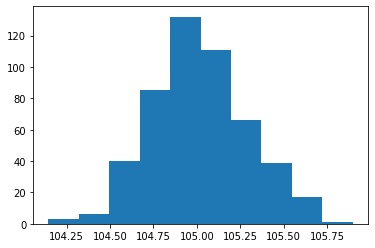

In [12]:
n = 500
autocorrelated_samples = [(generate_autocorrelated_data(0.5, 0, 1, sample_size) + POPULATION_MU) for i in range(n)]
autocorrelated_means = [np.mean(autocorrelated_samples[i]) for i in range(n)]

plt.hist(autocorrelated_means, 10)

_, pvalue, _, _ = jarque_bera(autocorrelated_means)

print (pvalue)
if pvalue > 0.05:
    print ('The distribution of sample means is likely normal, despite an autocorrelated underlying distribution.')
else:
    print ('The distribution of sample means is likely not normal.')

##Plotting Sample Standard Deviations - Autocorrelated

Draw 500 samples of size sample_size from the same autocorrelated distribution, plot the standard deviations of each of the samples, and check to see if the distribution of the sample standard deviations is normal.

0.12086637895424439
The distribution of sample standard deviations is likely normal.


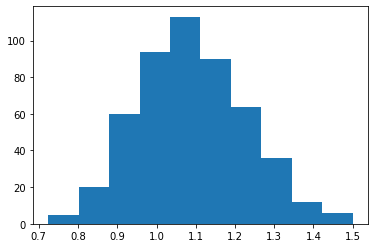

In [14]:
n = 500
autocorrelated_samples = [(generate_autocorrelated_data(0.5, 0, 1, sample_size) + POPULATION_MU) for i in range(n)]
autocorrelated_stds = [np.std(autocorrelated_samples[i]) for i in range(n)]

plt.hist(autocorrelated_stds, 10)

_, pvalue, _, _ = jarque_bera(autocorrelated_stds)

print (pvalue)
if pvalue > 0.05:
    print ('The distribution of sample standard deviations is likely normal.')
else:
    print ('The distribution of sample standard deviations is likely not normal, due to the autocorrelated underlying distribution and the different assumptions for the CLT for means and for standard deviations.')

#Small Sample Sizes
##a. Error Due to Small Sample Size

Run 100 samples of size small_size and measure how many of their 95% confidence intervals actually contain the true mean.

In [15]:
n = 100
small_size = 3
correct = 0
samples = [np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=small_size) for i in range(n)]
    
for i in range(n):
    sample_mean = np.mean(samples[i])
    sample_SE = stats.sem(samples[i])
    if ((POPULATION_MU >= -1.96 * sample_SE + sample_mean) and (POPULATION_MU <= 1.96 * sample_SE + sample_mean)):
        correct += 1

print ("Expected Result:", .95 * n)
print ("Actual Result:", correct)
print ("Due to the small sample size, the actual number of confidence intervals containing the population mean is much lower than what we would expect given a correctly calibrated interval.")

Expected Result: 95.0
Actual Result: 82
Due to the small sample size, the actual number of confidence intervals containing the population mean is much lower than what we would expect given a correctly calibrated interval.


##T-distribution Correction

Run 100 samples of size small_size, this time accouting for the small sample size using a t-distribution, and measure how many of their 95% confidence intervals actually contain the true mean.

In [17]:
n = 100
small_size = 5
correct = 0
samples = [np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=small_size) for i in range(n)]
    
for i in range(n):
    sample_mean = np.mean(samples[i])
    sample_SE = stats.sem(samples[i])
    h = sample_SE * stats.t.ppf((1+0.95) / 2, len(samples[i])-1)
    if ((POPULATION_MU >= sample_mean - h) and (POPULATION_MU <= sample_mean + h)):
        correct += 1

print ("Expected Result:", .95 * n)
print ("Actual Result:", correct)
print ("After using the t-distribution to correct for the smaller sample size, the actual number of confidence intervals containing the population mean is about what we expected.")

Expected Result: 95.0
Actual Result: 94
After using the t-distribution to correct for the smaller sample size, the actual number of confidence intervals containing the population mean is about what we expected.


#Dependence
##a. Error due to Dependence

Run 100 samples of the following autocorrelated distribution and measure how many of their 95% confidence intervals actually contain the true mean. (Use the helper function generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) to generate the samples)

In [19]:
n = 100
correct = 0
theta = 0.5
noise_mu = 0
noise_sigma = 1

for i in range(n):
    X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU
    sample_mean = np.mean(X)
    sample_SE = np.std(X) / np.sqrt(sample_size)
    if ((POPULATION_MU >= -1.96 * sample_SE + sample_mean) and (POPULATION_MU <= 1.96 * sample_SE + sample_mean)):
        correct += 1
    

print ("Expected Result:", .95 * n)
print ("Actual Result:", correct)
print ("Because the underlying data was autocorrelated, the actual number of confidence intervals containing the population mean is much lower than what we expected.")

Expected Result: 95.0
Actual Result: 72
Because the underlying data was autocorrelated, the actual number of confidence intervals containing the population mean is much lower than what we expected.


##T-distribution Correction

Run 100 samples from the autocorrelated distribution, this time attempting to account for the autocorrelation using a t-distribution, and measure how many of their 95% confidence intervals actually contain the true mean to see if the correction works.

In [21]:
n = 100
correct = 0

for i in range(n):
    X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU
    sample_mean = np.mean(X)
    sample_SE = np.std(X) / np.sqrt(sample_size)
    h = sample_SE * stats.t.ppf((1+0.95) / 2, len(X)-1)
    if ((POPULATION_MU >= sample_mean - h) and (POPULATION_MU <= sample_mean + h)):
        correct += 1
    

print ("Expected Result:", .95 * n)
print ("Actual Result:", correct)
print ("We did not see a significant improvement in the actual number of confidence intervals containing the population mean. This is because a t-distribution only corrects for small sample sizes, not autocorrelation.")

Expected Result: 95.0
Actual Result: 74
We did not see a significant improvement in the actual number of confidence intervals containing the population mean. This is because a t-distribution only corrects for small sample sizes, not autocorrelation.


##Newey-West Matrix

Use the newey_west_matrix helper function to compute an adjusted (robust) covariance matrix for a single sample of the autocorrelated data.

In [22]:
X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU

print (newey_west_matrix(X))


[[ 4.16696178e-02 -1.13405788e-03]
 [-1.13405788e-03  6.19627587e-05]]


##Newey-West Correction

Run 100 samples of the following autocorrelated distribution, this time accounting for the autocorrelation by using a Newey-West correction on the standard error, and measure how many of their 95% confidence intervals actually contain the true mean to see if the correction works. (Use the helper function newey_west_SE to find the corrected standard error)

In [23]:
n = 100
correct = 0

for i in range(n):
    X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU
    sample_mean = np.mean(X)
    sample_SE = newey_west_SE(X)
    if ((POPULATION_MU >= -1.96 * sample_SE + sample_mean) and (POPULATION_MU <= 1.96 * sample_SE + sample_mean)):
        correct += 1

print ("New Standard Error:", sample_SE)
print ("Expected Result:", .95 * n)
print ("Actual Result:", correct)
print ("After accounting for autocorrelation by finding a Newey-West standard error, the actual number of confidence intervals containing the population mean is about what we expected.")

New Standard Error: 0.4378657856178501
Expected Result: 95.0
Actual Result: 99
After accounting for autocorrelation by finding a Newey-West standard error, the actual number of confidence intervals containing the population mean is about what we expected.
